In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
salary = pd.read_csv('surveyUS.csv')
salary['gender'] = salary['gender'].astype('str') 
salary['race'] = salary['race'].astype('str') 
salary['age'] = salary['age'].astype('str') 
salary['state'] = salary['state'].astype('str')

In [3]:
salary.shape #21678 rows and 18 columns
salary

,timestamp,age,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,currency,currency_other,additional_context_on_income,country,state,city,years_of_professional_experience,years_of_experience_in_field,education_level,gender,race
0,4/27/2021 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
2,4/27/2021 11:02,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
3,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000,NaN,USD,NaN,NaN,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,5/17/2021 17:42,25-34,Media & Digital,Senior Reporter,Trade publication,85000,2000.0,USD,NaN,NaN,USA,New York,New York City,5-7 years,5-7 years,College degree,Woman,White
21674,5/17/2021 17:46,35-44,Nonprofits,Production and Workflow Manager,NaN,40000,NaN,USD,NaN,NaN,USA,Pennsylvania,Pittsburgh,11 - 20 years,2 - 4 years,College degree,Woman,Asian or Asian American
21675,5/17/2021 17:47,25-34,Computing or Tech,Chief of Staff,NaN,148000,29000.0,USD,NaN,NaN,USA,California,Bay Area,11 - 20 years,11 - 20 years,Master's degree,Woman,White
21676,5/17/2021 18:20,25-34,"Marketing, Advertising & PR",Digital Marketing Manager,"Small agency. I manage a team of ~15 people, b...",65000,5000.0,USD,NaN,NaN,United States,Washington,Seattle,2 - 4 years,2 - 4 years,College degree,Woman,White


In [4]:
#checking for null values
def get_proportion_null(df):
  return df.isna().sum()/len(df)

def drop_null_columns(df, thresh):
  null_props = get_proportion_null(df)
  high_null = null_props[null_props > thresh]
  high_null_names = list(high_null.index)
  df_dropped = df.drop(columns=high_null_names)
  return df_dropped

get_proportion_null(salary)
salary = drop_null_columns(salary,.7) #removing 3 rows with 70% or more na values
salary.head()

,timestamp,age,industry,job_title,annual_salary,other_monetary_comp,currency,country,state,city,years_of_professional_experience,years_of_experience_in_field,education_level,gender,race
0,4/27/2021 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
2,4/27/2021 11:02,25-34,Nonprofits,Program Manager,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
3,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02,25-34,Education (Higher Education),Scholarly Publishing Librarian,62000,NaN,USD,USA,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


In [5]:
salary = salary[salary['currency'] == 'USD']

In [6]:
salary['other_monetary_comp'].fillna(0, inplace =True)
salary.head()
salary.dtypes

timestamp                            object
age                                  object
industry                             object
job_title                            object
annual_salary                         int64
other_monetary_comp                 float64
currency                             object
country                              object
state                                object
city                                 object
years_of_professional_experience     object
years_of_experience_in_field         object
education_level                      object
gender                               object
race                                 object
dtype: object

In [7]:
salary['gender'] = np.where((salary['gender'] == 'Woman') |
                            (salary['gender'] == 'Man') | 
                            (salary['gender'] == 'Non-binary'), salary['gender'], 'pref not to answer')

In [8]:
gender_salary = salary.gender.value_counts().loc[lambda x: x>250] #filtering the dataset to only include those with 250 count
#this is to make the graph cleaner
gender_salary= gender_salary.to_frame()
gender_salary.reset_index(inplace = True)

In [9]:
salary['race'] = np.where((salary['race'] == 'White') |
                            (salary['race'] == 'Asian or Asian American') | 
                            (salary['race'] == 'Black or African American') | 
                            (salary['race'] == 'Hispanic, Latino, or Spanish origin') , salary['race'], 'pref not to answer')

In [10]:
race_salary = salary.race.value_counts().loc[lambda x: x>150] #read above
race_salary= race_salary.to_frame()
race_salary.reset_index(inplace = True)

In [11]:
age_salary = salary.age.value_counts()
age_salary= age_salary.to_frame()
age_salary.reset_index(inplace = True)


In [12]:
salary.dtypes
salary['state'] = salary.state.str.split(',').apply(lambda x: x[0])

In [13]:
us_state_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia' : 'DC'}

salary['state'] = salary['state'].map(us_state_abbrev).fillna(salary['state'])
salary['state']

0        MA
1        TN
2        WI
3        SC
4        NH
         ..
21673    NY
21674    PA
21675    CA
21676    WA
21677    MI
Name: state, Length: 21654, dtype: object

## EDA

# Looking at individual characteristics

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Woman'),
  Text(1, 0, 'Man'),
  Text(2, 0, 'Non-binary'),
  Text(3, 0, 'pref not to answer')])

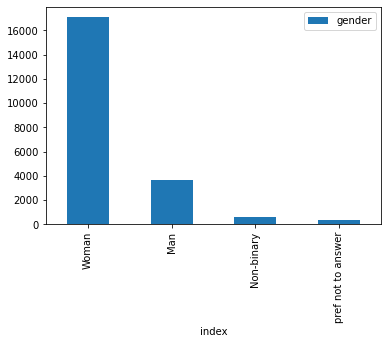

In [14]:
gender_salary.plot.bar('index','gender') #this also applies for top15 industries
plt.xticks(rotation=90)

<AxesSubplot:xlabel='index'>

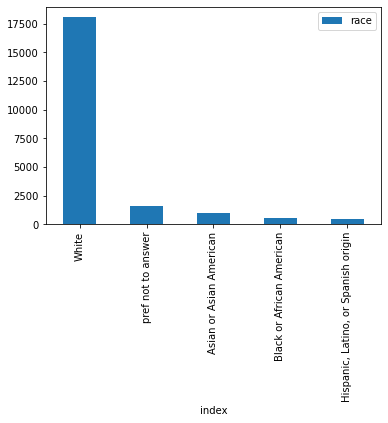

In [15]:
race_salary.plot.bar('index','race')

25-34         0.441119
35-44         0.361965
45-54         0.117207
18-24         0.037914
55-64         0.037591
65 or over    0.003787
under 18      0.000416
Name: age, dtype: float64

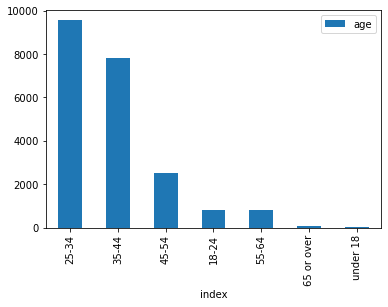

In [16]:
age_salary.plot.bar('index','age')
salary['age'].value_counts(normalize = True)

In [17]:
salary = salary[(salary['age'] == '25-34') | (salary['age'] == '35-44')]

Even though iWj wants to target a certain type of clients, the given dataset is heavily leaning towards roughly millenial white women.

College degree                        8411
Master's degree                       5875
Some college                           976
Professional degree (MD, JD, etc.)     932
PhD                                    842
High School                            243
Name: education_level, dtype: int64


<AxesSubplot:xlabel='education_level'>

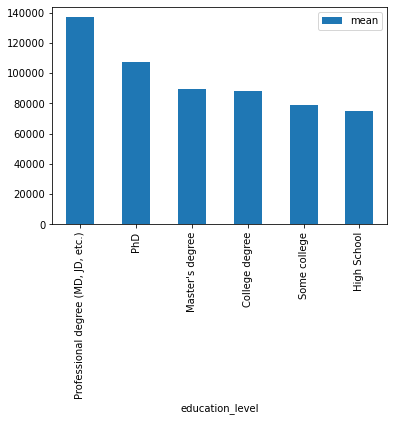

In [18]:
print(salary['education_level'].value_counts())
degree_and_industry = salary.groupby('education_level').annual_salary.agg(['count','mean'])

degree_and_industry = degree_and_industry[degree_and_industry['count'] > 10]
degree_and_industry.reset_index(inplace = True)
degree_and_industry.sort_values('mean', ascending = False, inplace = True)
degree_and_industry.plot.bar('education_level','mean')

# Looking at industry-wide characteristics

                                   index  industry  percentage
0                      Computing or Tech      2836    0.200580
1                             Nonprofits      1734    0.122640
2           Education (Higher Education)      1589    0.112384
3                            Health care      1153    0.081547
4          Accounting, Banking & Finance      1077    0.076172
5   Government and Public Administration      1059    0.074899
6           Engineering or Manufacturing      1021    0.072212
7                                    Law       774    0.054742
8            Marketing, Advertising & PR       754    0.053328
9          Education (Primary/Secondary)       528    0.037344
10                Business or Consulting       513    0.036283
11                       Media & Digital       469    0.033171
12                             Insurance       322    0.022774
13                     Recruitment or HR       310    0.021925


<AxesSubplot:ylabel='index'>

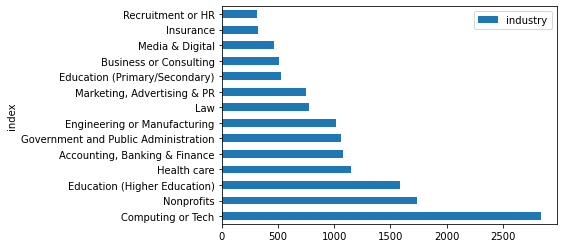

In [19]:
industry_salary = salary.industry.value_counts().loc[lambda x: x>300] #taking the top 15 industries
industry_salary= industry_salary.to_frame()
industry_salary.reset_index(inplace = True)
industry_salary['percentage'] = industry_salary['industry']/industry_salary['industry'].sum()
print(industry_salary.head(15))
industry_salary.plot.barh('index','industry')

<AxesSubplot:ylabel='industry'>

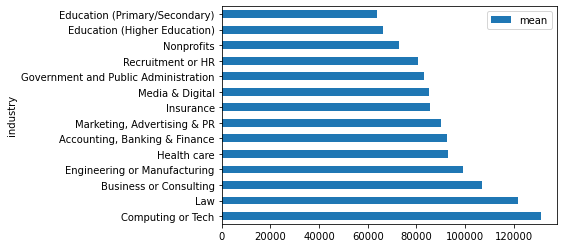

In [20]:
#Looking at the average salary by industry
salary_and_industry = salary.groupby('industry').annual_salary.agg(['count','mean'])
salary_and_industry = salary_and_industry[salary_and_industry['count'] > 300]
salary_and_industry.reset_index(inplace = True)
salary_and_industry.sort_values('mean', ascending = False, inplace = True)
salary_and_industry.plot.barh('industry','mean')

The people who work in the computing or tech industry are making the most amount of money AND also are most present in this area

## ATFQ

Considering the most popular age and the industry

In [21]:
top_15_industry = industry_salary['index'].to_list()
top_15_industry = salary[salary['industry'].isin(top_15_industry)]
top_15_industry.reset_index(drop = True, inplace = True)
top_15_industry.head()

,timestamp,age,industry,job_title,annual_salary,other_monetary_comp,currency,country,state,city,years_of_professional_experience,years_of_experience_in_field,education_level,gender,race
0,4/27/2021 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,55000,0.0,USD,United States,MA,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,0.0,USD,US,TN,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
2,4/27/2021 11:02,25-34,Nonprofits,Program Manager,62000,3000.0,USD,USA,WI,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
3,4/27/2021 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,7000.0,USD,US,SC,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02,25-34,Education (Higher Education),Scholarly Publishing Librarian,62000,0.0,USD,USA,NH,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White


## Looking at education level

College degree                        8411
Master's degree                       5875
Some college                           976
Professional degree (MD, JD, etc.)     932
PhD                                    842
High School                            243
Name: education_level, dtype: int64


<AxesSubplot:xlabel='education_level'>

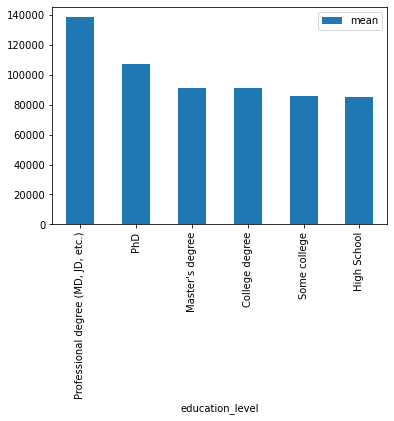

In [22]:
print(salary['education_level'].value_counts())
degree_and_industry = top_15_industry.groupby('education_level').annual_salary.agg(['count','mean'])

degree_and_industry = degree_and_industry[degree_and_industry['count'] > 10]
degree_and_industry.reset_index(inplace = True)
degree_and_industry.sort_values('mean', ascending = False, inplace = True)
degree_and_industry.plot.bar('education_level','mean')

We should be aiming for someone with a college degree or higher. Solely based on the data, people with some college or high school are not very well represented and also has the lowest earnings. Even though people with professional and phd does earn the highest, it is important to note that there are 7 times as many college and masters degree. If we want to target solely based on the earnings, we would target only the rpfessional degree but the amount of people in each group is also important

11 - 20 years       7058
8 - 10 years        4076
5-7 years           3555
2 - 4 years         1628
21 - 30 years        933
1 year or less       134
31 - 40 years          5
41 years or more       1
Name: years_of_professional_experience, dtype: int64


<AxesSubplot:xlabel='age'>

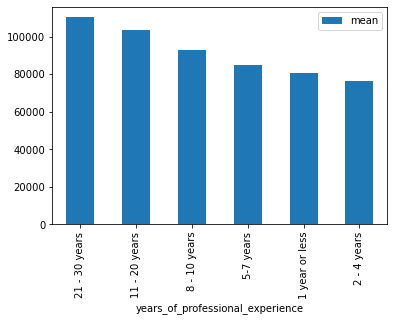

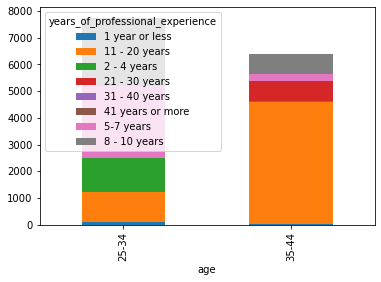

In [23]:
print(salary['years_of_professional_experience'].value_counts())
prof_ex_and_industry = top_15_industry.groupby('years_of_professional_experience').annual_salary.agg(['count','mean'])

prof_ex_and_industry = prof_ex_and_industry[prof_ex_and_industry['count'] > 10]
prof_ex_and_industry.reset_index(inplace = True)
prof_ex_and_industry.sort_values('mean', ascending = False, inplace = True)
prof_ex_and_industry.plot.bar('years_of_professional_experience','mean')


prof_ex_and_industry = top_15_industry.groupby(['years_of_professional_experience', 'age']).annual_salary.agg(['count','mean'])

prof_ex_and_industry.pivot_table(index = 'age', columns = 'years_of_professional_experience' , values = 'count').plot(kind = 'bar', stacked = True)


5-7 years           4762
11 - 20 years       4106
2 - 4 years         3934
8 - 10 years        3637
1 year or less       636
21 - 30 years        305
41 years or more       5
31 - 40 years          5
Name: years_of_experience_in_field, dtype: int64


<AxesSubplot:xlabel='years_of_experience_in_field'>

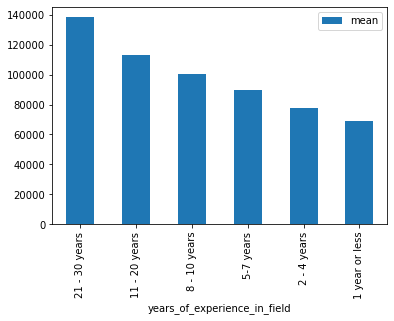

In [24]:
print(salary['years_of_experience_in_field'].value_counts())
spec_and_industry = top_15_industry.groupby('years_of_experience_in_field').annual_salary.agg(['count','mean'])

spec_and_industry = spec_and_industry[spec_and_industry['count'] > 10]
spec_and_industry.reset_index(inplace = True)
spec_and_industry.sort_values('mean', ascending = False, inplace = True)
spec_and_industry.plot.bar('years_of_experience_in_field','mean')

Suggesting the idea that iwj should target those that are in the age range of 25-44 with those that have been around the job market as they are the age that is most willing to switch jobs

In [25]:
salary.to_csv('salaryPython.csv')